##Sentiment Dataset

Accuracy: 65%

In [ ]:
#Import dependencies
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
import pandas as pd
import re
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
#read in the sentiment dataset
data = pd.read_csv('Sentiment.csv')
#Keep only the necessary columns
data = data[['text', 'sentiment']]

In [ ]:
#Look at what we're dealing with
data.head()

,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive


###Data pre-processing

In [ ]:
#Filter the tweets by lower casing and extracting punctuations
data['text'] = data['text'].apply(lambda x: x.lower())
data['text'] = data['text'].apply(lambda x: re.sub('[^a-zA-z0-0\s]','',x))

for idx, row in data.iterrows():
  row[0] = row[0].replace('rt','')

In [ ]:
#tokenizer to vectorize and convert text into sequences
max_features = 2000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(data['text'].values)
X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X)

In [ ]:
#binarize Y
labelencoder = LabelEncoder()
integer_encoded = labelencoder.fit_transform(data['sentiment'])
Y = to_categorical(integer_encoded)

In [ ]:
X.shape

(13871, 28)

In [ ]:
Y.shape

(13871, 3)

###Embedded Sequential Model

activation: softmax

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, GlobalMaxPool1D, MaxPooling1D, Conv1D, Flatten, LSTM
from keras.losses import BinaryCrossentropy

def model(X, Y):
  embed_dim = 128
  lstm_out = 196
  ##use sequential model
  model = Sequential()
  model.add(Embedding(max_features, embed_dim, input_length = X.shape[1])) ##Use X to get input length
  model.add(LSTM(lstm_out, dropout = 0.2, recurrent_dropout = 0.2)) ##LSTM
  model.add(Dense(Y.shape[1], activation='softmax')) ##Use Y to get output layer
  #compile the model
  model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
  return model

In [ ]:
#Defining Training and Test Data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.33, random_state = 42)

In [ ]:
X_train.shape

(9293, 28)

In [ ]:
Y_train.shape

(9293, 3)

In [ ]:
#Show the summary of the model
model = model(X, Y)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 28, 128)           256000    
                                                                 
 lstm_1 (LSTM)               (None, 196)               254800    
                                                                 
 dense_1 (Dense)             (None, 3)                 591       
                                                                 
Total params: 511,391
Trainable params: 511,391
Non-trainable params: 0
_________________________________________________________________


In [ ]:
batch_size = 32
#Fit the model
history = model.fit(X_train, Y_train, epochs=7, batch_size=batch_size, verbose=2)

Epoch 1/7
291/291 - 52s - loss: 0.8162 - accuracy: 0.6454 - 52s/epoch - 180ms/step
Epoch 2/7
291/291 - 58s - loss: 0.6718 - accuracy: 0.7106 - 58s/epoch - 200ms/step
Epoch 3/7
291/291 - 45s - loss: 0.6094 - accuracy: 0.7415 - 45s/epoch - 155ms/step
Epoch 4/7
291/291 - 46s - loss: 0.5611 - accuracy: 0.7649 - 46s/epoch - 160ms/step
Epoch 5/7
291/291 - 45s - loss: 0.5196 - accuracy: 0.7821 - 45s/epoch - 154ms/step
Epoch 6/7
291/291 - 45s - loss: 0.4759 - accuracy: 0.8029 - 45s/epoch - 154ms/step
Epoch 7/7
291/291 - 45s - loss: 0.4352 - accuracy: 0.8228 - 45s/epoch - 154ms/step


In [ ]:
#Save our model
model_name = 'ICP12.h5'
model.save(model_name, save_format='h5')

In [ ]:
# Model evaluation
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 65.47%


##Spam dataset

Accuracy: 98%

In [ ]:
#Import our dataset
data = pd.read_csv('spam.csv',encoding = "ISO-8859-1") #Using this because utf-8 encoding wasn't working

In [ ]:
#Show what columns we need to extract
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
#Keep only the necessary columns and swap v1 and v2 columns
data = data[['v2', 'v1']]

In [ ]:
data.head()

,v2,v1
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


###Data-preprocessing

In [ ]:
#Filter the text by lower casing and extracting punctuations
data['v2'] = data['v2'].apply(lambda x: x.lower())
data['v2'] = data['v2'].apply(lambda x: re.sub('[^a-zA-z0-0\s]','',x))

for idx, row in data.iterrows():
  row[0] = row[0].replace('rt','') #Really don't need this but we like to make sure we apply the same code

In [ ]:
#tokenizer to vectorize and convert text into sequences
max_features = 2000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(data['v2'].values)
X = tokenizer.texts_to_sequences(data['v2'].values)
X = pad_sequences(X)

In [ ]:
#binarize Y
labelencoder = LabelEncoder()
integer_encoded = labelencoder.fit_transform(data['v1'])
Y = to_categorical(integer_encoded)

In [ ]:
X.shape

(5572, 152)

In [ ]:
Y.shape

(5572, 2)

###Embedded Sequential Model

activation: softmax

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, GlobalMaxPool1D, MaxPooling1D, Conv1D, Flatten, LSTM
from keras.losses import BinaryCrossentropy

#model function
def model(X, Y):
  embed_dim = 128
  lstm_out = 196
  #Using sequential model
  model = Sequential()
  model.add(Embedding(max_features, embed_dim, input_length = X.shape[1])) #Using X shape to get input_length
  model.add(LSTM(lstm_out, dropout = 0.2, recurrent_dropout = 0.2)) #LSTM
  model.add(Dense(Y.shape[1], activation='softmax'))
  #Compile the model
  model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
  return model

In [ ]:
#Defining Training and Test Data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.33, random_state = 42)

In [ ]:
#Create an instance of our model with X and Y
model = model(X, Y)
#show summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 152, 128)          256000    
                                                                 
 lstm_2 (LSTM)               (None, 196)               254800    
                                                                 
 dense_2 (Dense)             (None, 2)                 394       
                                                                 
Total params: 511,194
Trainable params: 511,194
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Include early stopping Callback to prevent overfitting
earlyStop = keras.callbacks.EarlyStopping(
  monitor='loss',
  patience=5, 
  verbose=1,
  mode='auto', 
  restore_best_weights=True
)

In [ ]:
#Early Stopping Callback to prevent overfitting
batch_size = 32
#fit the model
history = model.fit(X_train, Y_train, epochs=7, batch_size=batch_size, verbose=2, callbacks=[earlyStop])

Epoch 1/7
117/117 - 101s - loss: 0.1767 - accuracy: 0.9475 - 101s/epoch - 864ms/step
Epoch 2/7
117/117 - 106s - loss: 0.0366 - accuracy: 0.9885 - 106s/epoch - 902ms/step
Epoch 3/7
117/117 - 105s - loss: 0.0174 - accuracy: 0.9944 - 105s/epoch - 901ms/step
Epoch 4/7
117/117 - 115s - loss: 0.0110 - accuracy: 0.9971 - 115s/epoch - 984ms/step
Epoch 5/7
117/117 - 98s - loss: 0.0058 - accuracy: 0.9981 - 98s/epoch - 839ms/step
Epoch 6/7
117/117 - 99s - loss: 0.0025 - accuracy: 0.9995 - 99s/epoch - 848ms/step
Epoch 7/7
117/117 - 99s - loss: 9.5190e-04 - accuracy: 0.9997 - 99s/epoch - 842ms/step


In [ ]:
# Model evaluation
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 98.91%


## Transfer Learning

In this part of the ICP, we will try to apply the Transfer Learning from the ImageNet Classifier to the Cats and Dogs dataset. We will follow the tutorial that is found in the link below.

https://keras.io/guides/transfer_learning/#an-endtoend-example-finetuning-an-image-classification-model-on-a-cats-vs-dogs-dataset

### Preprocessing

In [ ]:
from tensorflow import keras
from keras import layers
import tensorflow_datasets
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Import the dataset from tensorflow datasets
train_ds, validation_ds, test_ds = tensorflow_datasets.load(
    "cats_vs_dogs",
    # Reserve 10% for validation and 10% for test
    split=["train[:40%]", "train[40%:50%]", "train[50%:60%]"],
    as_supervised=True,  # Include labels
)

Let's get the size of the dataset

In [ ]:
print("Number of training samples: %d" % tf.data.experimental.cardinality(train_ds))
print("Number of validation samples: %d" % tf.data.experimental.cardinality(validation_ds))
print("Number of test samples: %d" % tf.data.experimental.cardinality(test_ds))

Number of training samples: 9305
Number of validation samples: 2326
Number of test samples: 2326


We can visualize the dataset with matplotlib. 

This visualization is similar to what we did with the handwritten digits dataset

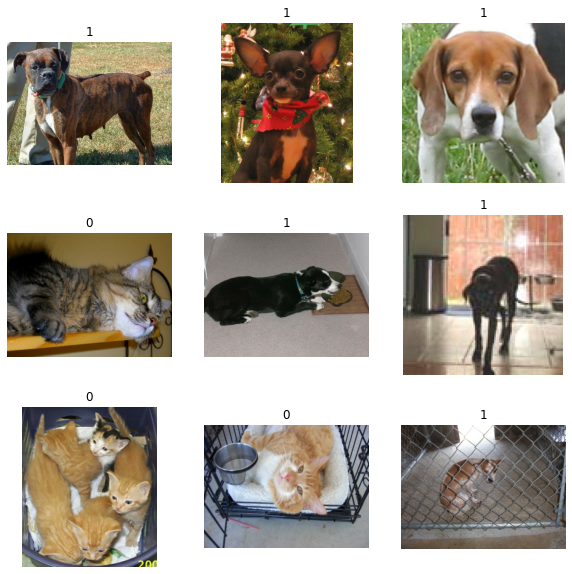

In [ ]:
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(int(label))
    plt.axis("off")

Let's resize the data so that all the Cats and Dogs have the same dimensions

In [ ]:
#Size that we want to reshape to
size = (150, 150)

#Reshape the training, validation, and test datasets
train_ds = train_ds.map(lambda x, y: (tf.image.resize(x, size), y))
validation_ds = validation_ds.map(lambda x, y: (tf.image.resize(x, size), y))
test_ds = test_ds.map(lambda x, y: (tf.image.resize(x, size), y))

This step batches the data and uses prefetching so we can increase the loading speed in the NN.

In [ ]:
batch_size = 32

train_ds = train_ds.cache().batch(batch_size).prefetch(buffer_size=10)
validation_ds = validation_ds.cache().batch(batch_size).prefetch(buffer_size=10)
test_ds = test_ds.cache().batch(batch_size).prefetch(buffer_size=10)

We can augment the data so that the classification is more robust. This augmentation will flip the image horizontally and/or slightly rotate the image

In [ ]:
data_augmentation = keras.Sequential(
    [layers.RandomFlip("horizontal"), layers.RandomRotation(0.1),]
)

We visualize the data augmentation as shown below.

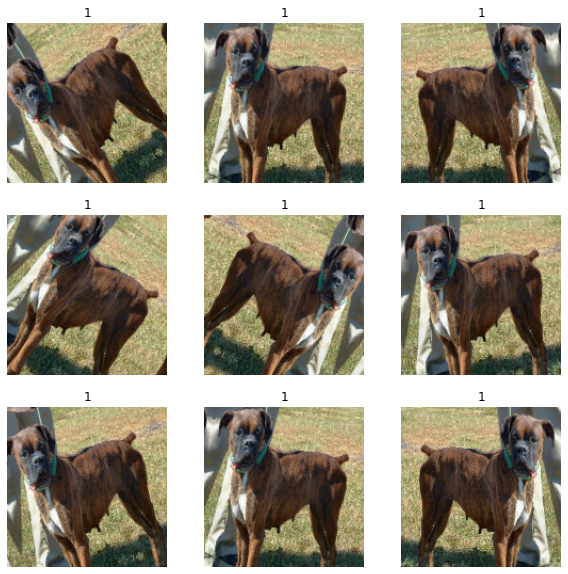

In [ ]:
for images, labels in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    first_image = images[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0), training=True)
        plt.imshow(augmented_image[0].numpy().astype("int32"))
        plt.title(int(labels[0]))
        plt.axis("off")

### Building the Model

We will use the imagenet classifier as our base layer. This classifier can classify over images into over 1000 categories but we will only want the base layers

In [ ]:
#Define the base layers without the top layer
base_model = keras.applications.Xception(
    weights="imagenet",  # Load weights pre-trained on ImageNet.
    input_shape=(150, 150, 3),
    include_top=False,
)

# Freeze the base model so that we don't train those weight
base_model.trainable = False

We need to craft our dataset so that it can be run through the imagenet classifier

In [ ]:
# Create an input layer so that
inputs = keras.Input(shape=(150, 150, 3))
x = data_augmentation(inputs)  # Apply random data augmentation

# The imagenet weights require the input to be scaled from (0, 255) with a range of (-1, +1)
scale_layer = keras.layers.Rescaling(scale=1 / 127.5, offset=-1)
x = scale_layer(x)

We can now send our dataset through the base_model we created earlier and craft the Neural Network.

In [ ]:
#We set training = False so that the BatchNormalization layers won't update their internal state
x = base_model(x, training=False)

#Pooling layer to reduce dimensions
x = keras.layers.GlobalAveragePooling2D()(x)

#Dropout layer to reduce overfitting
x = keras.layers.Dropout(0.2)(x)  

#Output layer with 1 node (2 total classes)
outputs = keras.layers.Dense(1)(x)

#Build a model
model = keras.Model(inputs, outputs)

#Summarize the model
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 sequential_5 (Sequential)   (None, 150, 150, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                           

Compile the model with Binary Crossentropy and adan optimizer

In [ ]:
model.compile(
    optimizer='adam',
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy']
)

### Training the model

In [ ]:
epochs = 5
model.fit(train_ds, epochs=epochs, validation_data=validation_ds)

Epoch 1/5
291/291 [==============================] - 958s 3s/step - loss: 0.1670 - accuracy: 0.9307 - val_loss: 0.0801 - val_accuracy: 0.9695
Epoch 2/5
291/291 [==============================] - 889s 3s/step - loss: 0.1177 - accuracy: 0.9520 - val_loss: 0.0752 - val_accuracy: 0.9716
Epoch 3/5
291/291 [==============================] - 888s 3s/step - loss: 0.1107 - accuracy: 0.9542 - val_loss: 0.0782 - val_accuracy: 0.9678
Epoch 4/5
291/291 [==============================] - 888s 3s/step - loss: 0.1067 - accuracy: 0.9549 - val_loss: 0.0708 - val_accuracy: 0.9695
Epoch 5/5
291/291 [==============================] - 887s 3s/step - loss: 0.0997 - accuracy: 0.9616 - val_loss: 0.0709 - val_accuracy: 0.9721


### Fine=Tuning the Model

We can unfreeze the weights of the base model and train those layers. This will allow for more refined accuracy. We also set the learning rate to be very low.

In [ ]:
base_model.trainable = True
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 sequential_5 (Sequential)   (None, 150, 150, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                           

Compile the fine-tuned model

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(1e-5),  # Low learning rate
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

Train the fine-tuned model

In [ ]:
epochs = 5
model.fit(train_ds, epochs=epochs, validation_data=validation_ds)

Epoch 1/5
291/291 [==============================] - 3284s 11s/step - loss: 0.0863 - accuracy: 0.9659 - val_loss: 0.0524 - val_accuracy: 0.9776
Epoch 2/5
291/291 [==============================] - 3245s 11s/step - loss: 0.0570 - accuracy: 0.9771 - val_loss: 0.0491 - val_accuracy: 0.9798
Epoch 3/5
291/291 [==============================] - 3241s 11s/step - loss: 0.0463 - accuracy: 0.9821 - val_loss: 0.0457 - val_accuracy: 0.9815
Epoch 4/5
291/291 [==============================] - 3267s 11s/step - loss: 0.0352 - accuracy: 0.9862 - val_loss: 0.0448 - val_accuracy: 0.9815
Epoch 5/5
291/291 [==============================] - 3263s 11s/step - loss: 0.0310 - accuracy: 0.9883 - val_loss: 0.0479 - val_accuracy: 0.9828
